# Import

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

# Functions

In [240]:
#Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

#Проверка столбца (dtype float) при помощи гистограммы и 
#его характеристики (количество значений в столбце, среднее, стандартное отклонение, минимальное,
#25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())


# При добавлении нового столбца (dummy перменной) 
# ставим 1 - при наличии, 0 - при отсутствии
def find_item(cell):
    if item in cell:
        return 1
    return 0


# Проверка отсутствия значений в столбце
def procent_check(column, df):
    math = 100 - ((df[column].count() * 100) / len(df))
    print("В столбце",column,"отсутствует", '\033[4m' + str(round(math, 2)),"процентов" + '\033[0m',"информации.")
    
# Вывод основных статистических данных категориальных признаков
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Построение гистограммы и вывод основных статистических данных цифровых признаков
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())
    

# Короткая проверка датасета
def df_check(df):
    display(df.head())
    display(df.info())
    
def replace_nan(df,column):
    return df[column].astype(str).apply(lambda x: 'Unknown' if x == 'nan' else x)

# ---------------------------- Data ----------------------------

# Информация

### Customers:

* <i>CustomerKey</i> : ID клиента
* <i> FirstName</i> : Имя клиента 
* <i> LastName</i> : Фамилия клиента
* <i> Full Name</i> : Имя и Фамилия клиента
* <i> BirthDate</i> : День рождения клиента
* <i> AgeOfCustomer</i> : Возраст клиента на момент заказа
<br> &#10149; (данные получены при помощи 'BirthDate' и 'DateFirstPurchase')
* <i> Gender</i> : Пол клиента
* <i> DateFirstPurchase</i> : Дата заказа товара 
* <i> Customer City</i> : Город клиента

### Sales:

* <i> ProductKey</i> : ID товара
* <i> OrderDateKey</i> : ID Даты заказа
* <i> DueDateKey</i> : ID Срока сдачи
* <i> ShipDateKey</i> : ID Даты отправки 
* <i> SalesOrderNumber</i> : Номер поставки
* <i> SalesAmount</i> : Объем продаж

### Products:

* <i> ProductKey</i> : ID клиента
* <i> ProductItemCode</i> : Серия товара 
* <i> Product Name</i> : Название товара
* <i> Sub Category</i> : Подкатегория товара
* <i> Product Category</i> : Категория товара
* <i> StandardCost</i> : Стоимость товара
* <i> Product Color</i> : Цвет товара
* <i> Product Size</i> : Размер товара 
* <i> Product Line</i> : Линия товара
* <i> Model Name</i> : Название модели
* <i> Product Description</i> : Описание товара
* <i> Product Description DE</i> : Описание товара на немецком  
* <i> Product Status</i> : Статус товара

### Calendar:

* <i> OrderDateKey</i> : ID даты
* <i> Date</i> : Дата 
* <i> Day</i> : День
* <i> Month</i> : Месяц
* <i> MonthShort</i> : Месяц сокр.
* <i> MonthNr</i> : Номер месяца
* <i> Quarter</i> : Квартал
* <i> Year</i> : Год

# Готовим датасеты

### Даты

### Выгрузим все датасеты по отдельности

In [241]:
# Даты
calendar = pd.read_csv('DIM_Calendar.csv', sep = ';')

# Клиенты
customers = pd.read_csv('DIM_Customer.csv', sep = ';')

# Товар
products = pd.read_csv('DIM_Product.csv', sep = ';')

# Онлайн продажа товара
sales = pd.read_csv('DIM_OnlineSales.csv', sep = ';')

# Список стран
countries = pd.read_csv('DIM_countries.csv', sep = ';')

### Даты

In [242]:
calendar = calendar.rename(columns={'DateKey': 'OrderDateKey'})

In [243]:
df_check(calendar)

,OrderDateKey,Date,Day,Month,MonthShort,MonthNr,Quarter,Year
0,20190101,2019-01-01,Tuesday,January,Jan,1,1,2019
1,20190102,2019-01-02,Wednesday,January,Jan,1,1,2019
2,20190103,2019-01-03,Thursday,January,Jan,1,1,2019
3,20190104,2019-01-04,Friday,January,Jan,1,1,2019
4,20190105,2019-01-05,Saturday,January,Jan,1,1,2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderDateKey  1096 non-null   int64 
 1   Date          1096 non-null   object
 2   Day           1096 non-null   object
 3   Month         1096 non-null   object
 4   MonthShort    1096 non-null   object
 5   MonthNr       1096 non-null   int64 
 6   Quarter       1096 non-null   int64 
 7   Year          1096 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 68.6+ KB


None

### Клиенты

In [244]:
df_check(customers)

,CustomerKey,FirstName,LastName,Full Name,BirthDate,AgeOfCustomer,Gender,DateFirstPurchase,Customer City,Region Code,State Code
0,11000,Jon,Yang,JonYang,1971-10-06,47,Male,2018-01-19,Rockhampton,AU,QLD
1,11001,Eugene,Huang,EugeneHuang,1976-05-10,42,Male,2018-01-15,Seaford,AU,VIC
2,11002,Ruben,Torres,RubenTorres,1971-02-09,47,Male,2018-01-07,Hobart,AU,TAS
3,11003,Christy,Zhu,ChristyZhu,1973-08-14,44,Female,2017-12-29,North Ryde,AU,NSW
4,11004,Elizabeth,Johnson,ElizabethJohnson,1979-08-05,39,Female,2018-01-23,Wollongong,AU,NSW


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerKey        18484 non-null  int64 
 1   FirstName          18484 non-null  object
 2   LastName           18484 non-null  object
 3   Full Name          18484 non-null  object
 4   BirthDate          18484 non-null  object
 5   AgeOfCustomer      18484 non-null  int64 
 6   Gender             18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   Customer City      18484 non-null  object
 9   Region Code        18484 non-null  object
 10  State Code         18484 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.6+ MB


None

In [245]:
customers.rename(columns = {'Customer City':'City'}, inplace = True)

#### Как мы видим, большинство клиентов из Лондона и Парижа

<AxesSubplot:>

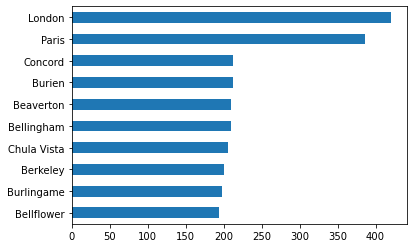

In [246]:
customers['City'].value_counts().head(10).sort_values().plot(kind='barh')

#### Проверяем страны клиентов, которые совершили самые рание заказы 

In [247]:
customers['City'][customers['DateFirstPurchase'] == min(customers['DateFirstPurchase'])]

3           North Ryde
3501     Beverly Hills
10768        Metchosin
14863          Lebanon
17389           Pantin
Name: City, dtype: object

#### Исследуем возрастные группы

8 клиентов старше 100 лет. Что составляет 0.04 % от количества клиентов.
221 клиентов от 80 до 100 лет. Что составляет 1.2 % от количества клиентов.
3929 клиентов от 60 до 80 лет. Что составляет 21.26 % от количества клиентов.
4589 клиентов от 50 до 60 лет. Что составляет 24.83 % от количества клиентов.
6409 клиентов от 40 до 50 лет. Что составляет 34.67 % от количества клиентов.
3328 клиентов от 30 до 40 лет. Что составляет 18.0 % от количества клиентов.
0 клиентов от 20 до 30 лет. Что составляет 0.0 % от количества клиентов.


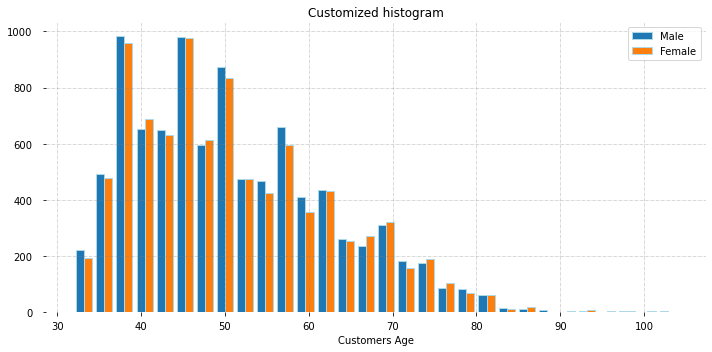

In [248]:
print(len(customers[(customers['AgeOfCustomer'] > 100)]),"клиентов старше 100 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] > 100)]) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] <= 100) &(customers['AgeOfCustomer'] >= 80)] ),"клиентов от 80 до 100 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] <= 100) &(customers['AgeOfCustomer'] >= 80)] )* 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] <= 79) &(customers['AgeOfCustomer'] >= 60)] ),"клиентов от 60 до 80 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 60) &(customers['AgeOfCustomer'] <= 79)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 50) &(customers['AgeOfCustomer'] <= 59)] ),"клиентов от 50 до 60 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 50) &(customers['AgeOfCustomer'] <= 59)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 40) &(customers['AgeOfCustomer'] <= 49)] ),"клиентов от 40 до 50 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 40) &(customers['AgeOfCustomer'] <= 49)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 30) &(customers['AgeOfCustomer'] <= 39)] ),"клиентов от 30 до 40 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 30) &(customers['AgeOfCustomer'] <= 39)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 20) &(customers['AgeOfCustomer'] <= 29)] ),"клиентов от 20 до 30 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 20) &(customers['AgeOfCustomer'] <= 29)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

#customers.groupby('Gender')['AgeOfCustomer'].plot(kind='kde')
#customers['AgeOfCustomer'].hist()
legend = ['Male', 'Female']
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 5),
                        tight_layout = True)

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
    
#axs.xaxis.set_ticks_position('none')
#axs.yaxis.set_ticks_position('none')

axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

#N, bins, patches = axs.hist(customers['AgeOfCustomer'], bins = 30, histtype='bar', ec='lightblue')
axs.hist([customers['AgeOfCustomer'][customers['Gender'] == 'Male'],
          customers['AgeOfCustomer'][customers['Gender'] == 'Female']],
         bins = 30, 
         histtype='bar', 
         ec='lightblue')
#axs.hist(customers['AgeOfCustomer'][customers['Gender'] == 'Female'], bins = 30, histtype='bar', ec='lightblue')

plt.xlabel("Customers Age")
plt.legend(legend)
plt.title('Customized histogram')
 
# Show plot
plt.show()

In [249]:
# Проверяем датасет на наличие пустых значений
customers.columns[customers.isnull().any()]

Index([], dtype='object')

#### Отсавим все столбцы для дальнейшего объединения.

In [250]:
# Избавляемся ненужных столбцов

# -- FirstName
# -- LastName

# так как мы заранее создали столбец возраста 
# в SQL, удалим следующие столбцы:

# -- BirthDate
# -- DateFirstPurchase

#customers = customers.drop(['FirstName', 'LastName', 'BirthDate', 'DateFirstPurchase'], axis = 1)

### Продажи

In [251]:
df_check(sales)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,20190101,20190113,20190108,16942,SO46700,"1000,4375"
1,375,20190101,20190113,20190108,15114,SO46701,"2181,5625"
2,369,20190101,20190113,20190108,15116,SO46702,"2443,35"
3,337,20190101,20190113,20190108,20576,SO46703,"782,99"
4,370,20190101,20190113,20190108,13059,SO46704,"2443,35"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        58168 non-null  int64 
 1   OrderDateKey      58168 non-null  int64 
 2   DueDateKey        58168 non-null  int64 
 3   ShipDateKey       58168 non-null  int64 
 4   CustomerKey       58168 non-null  int64 
 5   SalesOrderNumber  58168 non-null  object
 6   SalesAmount       58168 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


None

In [252]:
# Проверяем датасет на наличие пустых значений
sales.columns[sales.isnull().any()]

Index([], dtype='object')

In [253]:
# Избавляемся от ненужных столбцов:
# -- OrderDateKey
# -- DueDateKey
# -- ShipDateKey
# -- SalesOrderNumber

#sales = sales.drop(['DueDateKey', 'ShipDateKey', 'SalesOrderNumber'], axis = 1)

#### Поемняем тип данных у столбца -- SalesAmount в float

In [254]:
sales['SalesAmount'] = pd.to_numeric(sales['SalesAmount'].str.replace(",", "."))

### Товары

In [255]:
df_check(products)

,ProductKey,ProductItemCode,Product Name,Sub Category,Product Category,StandardCost,Product Color,Product Size,Product Line,Model Name,Product Description,Product Description DE,Product Status
0,1,AR-5381,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,BA-8327,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,3,BE-2349,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,4,BE-2908,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
4,5,BL-2036,Blade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductKey              606 non-null    int64 
 1   ProductItemCode         606 non-null    object
 2   Product Name            606 non-null    object
 3   Sub Category            397 non-null    object
 4   Product Category        397 non-null    object
 5   StandardCost            395 non-null    object
 6   Product Color           352 non-null    object
 7   Product Size            299 non-null    object
 8   Product Line            380 non-null    object
 9   Model Name              397 non-null    object
 10  Product Description     396 non-null    object
 11  Product Description DE  396 non-null    object
 12  Product Status          606 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.7+ KB


None

In [256]:
# Проверяем столбцы, в которых пустые значения

products.columns[products.isnull().any()]

Index(['Sub Category', 'Product Category', 'StandardCost', 'Product Color',
       'Product Size', 'Product Line', 'Model Name', 'Product Description',
       'Product Description DE'],
      dtype='object')

В столбце Sub Category отсутствует 34.49 процентов информации.
В столбце Product Category отсутствует 34.49 процентов информации.
В столбце StandardCost отсутствует 34.82 процентов информации.
В столбце Product Color отсутствует 41.91 процентов информации.
В столбце Product Size отсутствует 50.66 процентов информации.
В столбце Product Line отсутствует 37.29 процентов информации.
В столбце Model Name отсутствует 34.49 процентов информации.
В столбце Product Description отсутствует 34.65 процентов информации.
В столбце Product Description DE отсутствует 34.65 процентов информации.


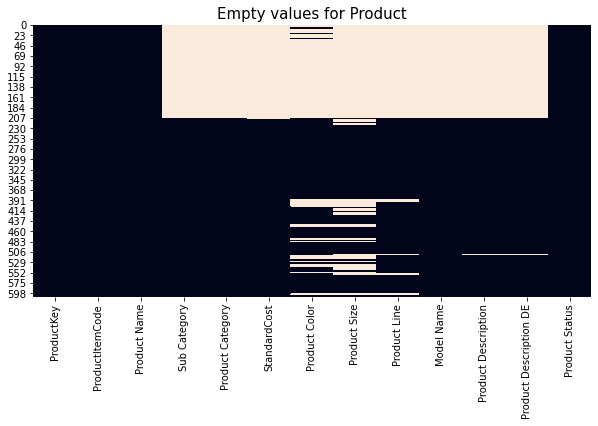

In [257]:
# Проверяем процент пустых значений
procent_check('Sub Category', products)
procent_check('Product Category', products)
procent_check('StandardCost', products)
procent_check('Product Color', products)
procent_check('Product Size', products)
procent_check('Product Line', products)
procent_check('Model Name', products)
procent_check('Product Description', products)
procent_check('Product Description DE', products)

fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.heatmap(products.isna(), ax=axes,
                    cbar = False)
axes.set_title(f'Empty values for Product',
                          size=15)
plt.subplots_adjust(hspace=1);

In [258]:
# Проверим минимальный номер товара
sales['ProductKey'].min()

214

In [259]:
# Проверим какие товары (номер) отсутствуют
print('Отсутствуют товары (номера) с',min(products['ProductKey'][products['StandardCost'].isna()]), 'по',max(products['ProductKey'][products['StandardCost'].isna()]))

Отсутствуют товары (номера) с 1 по 211


In [260]:
# Так как товары не были заказаны вообще, то мы их удалим
#products.dropna(subset=['StandardCost'], inplace = True)

In [261]:
# Столбец -- StandardCost хранит в себе данные о стоимости товара
# Необходимо поменять тип этих данных и найти решение на замену 
# пустых показателей

#products["StandardCost"] = pd.to_numeric(products["StandardCost"].str.replace(',','.'))

In [262]:
# Для проверки
#products["StandardCost"] = products["StandardCost"].fillna(0.0)

### Проверим наличие одинаковых позиций, возможно произошел сбой при сборке

In [263]:
search_for_null_new = products[products["StandardCost"].isna()]
search_for_null_new.groupby(products["StandardCost"].isna(), sort = True)['ProductItemCode'].value_counts()

StandardCost  ProductItemCode
True          AR-5381            1
              BA-8327            1
              BE-2349            1
              BE-2908            1
              BL-2036            1
                                ..
              SR-2098            1
              SS-2985            1
              ST-9828            1
              TO-2301            1
              TP-0923            1
Name: ProductItemCode, Length: 211, dtype: int64

In [264]:
search_for_null = products.ProductItemCode[products["StandardCost"].isna()]
search_for_value = products.ProductItemCode[products["StandardCost"].notna()]

In [265]:
test_for_value = {}

for item in search_for_null:
    test_for_value[item] = 0

for item in test_for_value:
    for cell in search_for_value:
        if cell == item:
            test_for_value[item] +=1
        else:
            test_for_value[item] +=0

In [266]:
# Убедимся, что товар был уникальным и не встречается в датасете более 1 раза
display(sum(map((0).__eq__, test_for_value.values())))
test_for_value.items()

211

dict_items([('AR-5381', 0), ('BA-8327', 0), ('BE-2349', 0), ('BE-2908', 0), ('BL-2036', 0), ('CA-5965', 0), ('CA-6738', 0), ('CA-7457', 0), ('CB-2903', 0), ('CN-6137', 0), ('CR-7833', 0), ('CR-9981', 0), ('CS-2812', 0), ('DC-8732', 0), ('DC-9824', 0), ('DT-2377', 0), ('EC-M092', 0), ('EC-R098', 0), ('EC-T209', 0), ('FE-3760', 0), ('FH-2981', 0), ('FW-1000', 0), ('FW-1200', 0), ('FW-1400', 0), ('FW-3400', 0), ('FW-3800', 0), ('FW-5160', 0), ('FW-5800', 0), ('FW-7160', 0), ('FW-9160', 0), ('FC-3654', 0), ('FC-3982', 0), ('FL-2301', 0), ('GP-0982', 0), ('GT-0820', 0), ('GT-1209', 0), ('GT-2908', 0), ('HJ-1213', 0), ('HJ-1220', 0), ('HJ-1420', 0), ('HJ-1428', 0), ('HJ-3410', 0), ('HJ-3416', 0), ('HJ-3816', 0), ('HJ-3824', 0), ('HJ-5161', 0), ('HJ-5162', 0), ('HJ-5811', 0), ('HJ-5818', 0), ('HJ-7161', 0), ('HJ-7162', 0), ('HJ-9080', 0), ('HJ-9161', 0), ('HN-1024', 0), ('HN-1032', 0), ('HN-1213', 0), ('HN-1220', 0), ('HN-1224', 0), ('HN-1420', 0), ('HN-1428', 0), ('HN-3410', 0), ('HN-3416', 

#### Способ 2

In [267]:
search_for_name = products['Product Name'][products["StandardCost"].isna()]

col = {}

for item in search_for_name:
    col[item] = 0

for item in col:
    for cell in search_for_name:
        if cell == item:
            col[item] +=1
        else:
            0

In [268]:
display(sum(map((1).__eq__, col.values())))
len(col)

211

211

In [269]:
# Так как не удалось восстановить данные 
# по причине отсутствия дополнительных сведений,
# мы избавляемся от ненужных данных,
# но сначала избавимся от ненужных нам столбцов

# Избавляемся от ненужных столбцов:
# -- ProductItemCode
# -- Product Color
# -- Product Size
# -- Product Line
# -- Model Name
# -- Product Status

#products = products.drop(['ProductItemCode','Product Color','Product Size'
#                         ,'Product Line','Model Name','Product Status'], axis = 1)

In [270]:
products = products[products['StandardCost'].notna()]

### Страны

In [271]:
df_check(countries)

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,1,Alexandria,NSW,New South Wales,AU,Australia,Australia,Australie,2015,9,198.51.100.2
1,2,Coffs Harbour,NSW,New South Wales,AU,Australia,Australia,Australie,2450,9,198.51.100.3
2,3,Darlinghurst,NSW,New South Wales,AU,Australia,Australia,Australie,2010,9,198.51.100.4
3,4,Goulburn,NSW,New South Wales,AU,Australia,Australia,Australie,2580,9,198.51.100.5
4,5,Lane Cove,NSW,New South Wales,AU,Australia,Australia,Australie,1597,9,198.51.100.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GeographyKey              655 non-null    int64 
 1   City                      655 non-null    object
 2   StateProvinceCode         655 non-null    object
 3   StateProvinceName         655 non-null    object
 4   CountryRegionCode         655 non-null    object
 5   EnglishCountryRegionName  655 non-null    object
 6   SpanishCountryRegionName  655 non-null    object
 7   FrenchCountryRegionName   655 non-null    object
 8   PostalCode                655 non-null    object
 9   SalesTerritoryKey         655 non-null    int64 
 10  IpAddressLocator          655 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.4+ KB


None

## Собираем единный датасет

In [272]:
users = pd.merge(customers, countries, on = 'City', how = 'left')
users.columns

Index(['CustomerKey', 'FirstName', 'LastName', 'Full Name', 'BirthDate',
       'AgeOfCustomer', 'Gender', 'DateFirstPurchase', 'City', 'Region Code',
       'State Code', 'GeographyKey', 'StateProvinceCode', 'StateProvinceName',
       'CountryRegionCode', 'EnglishCountryRegionName',
       'SpanishCountryRegionName', 'FrenchCountryRegionName', 'PostalCode',
       'SalesTerritoryKey', 'IpAddressLocator'],
      dtype='object')

In [273]:
users = pd.merge(customers, countries, on = 'City', how = 'left')

# Проверяем кол-во клиентов из разных стран
users.groupby(['EnglishCountryRegionName'])['CustomerKey'].count().sort_values(ascending = False)

EnglishCountryRegionName
United States     8139
United Kingdom    7834
France            6562
Germany           5150
Australia         3591
Canada            2382
Name: CustomerKey, dtype: int64

In [274]:
online_sales = pd.merge(sales, products, on = 'ProductKey', how = 'left')

# Проверяем самые популярные товары по категориям
online_sales.groupby(['Product Category', 'Product Name'])['CustomerKey'].count().sort_values(ascending = False)

# Проверим самый дорогой сегмент по категориям товаров
online_sales.groupby(['Product Category', 'Product Name'])['StandardCost'].max().sort_values(ascending = False)

Product Category  Product Name         
Accessories       LL Mountain Tire         9,3463
                  ML Road Tire             9,3463
Clothing          Half-Finger Gloves, L    9,1593
                  Half-Finger Gloves, M    9,1593
                  Half-Finger Gloves, S    9,1593
                                            ...  
Accessories       Mountain Tire Tube       1,8663
                  Water Bottle - 30 oz.    1,8663
                  Touring Tire Tube        1,8663
                  Road Tire Tube           1,4923
                  Patch Kit/8 Patches      0,8565
Name: StandardCost, Length: 117, dtype: object

In [275]:
full_sales = pd.merge(online_sales, calendar, on = 'OrderDateKey', how = 'left')

In [276]:
df = pd.merge(full_sales, users, on = 'CustomerKey', how = 'left')

In [277]:
df_check(df)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount,ProductItemCode,Product Name,Sub Category,...,GeographyKey,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,381,20190101,20190113,20190108,16942,SO46700,1000.4375,BK-R64Y-38,"Road-550-W Yellow, 38",Road Bikes,...,220,93,Seine Saint Denis,FR,France,Francia,France,93000,7,198.51.100.221
1,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,176,SL,Saarland,DE,Germany,Alemania,Allemagne,70452,8,198.51.100.177
2,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,177,SL,Saarland,DE,Germany,Alemania,Allemagne,70511,8,198.51.100.178
3,369,20190101,20190113,20190108,15116,SO46702,2443.3500,BK-R89R-48,"Road-250 Red, 48",Road Bikes,...,133,HE,Hessen,DE,Germany,Alemania,Allemagne,34117,8,198.51.100.134
4,337,20190101,20190113,20190108,20576,SO46703,782.9900,BK-R50B-62,"Road-650 Black, 62",Road Bikes,...,244,ENG,England,GB,United Kingdom,Reino Unido,Royaume-Uni,C2H 7AU,10,198.51.100.245


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108878 entries, 0 to 108877
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ProductKey                108878 non-null  int64  
 1   OrderDateKey              108878 non-null  int64  
 2   DueDateKey                108878 non-null  int64  
 3   ShipDateKey               108878 non-null  int64  
 4   CustomerKey               108878 non-null  int64  
 5   SalesOrderNumber          108878 non-null  object 
 6   SalesAmount               108878 non-null  float64
 7   ProductItemCode           108878 non-null  object 
 8   Product Name              108878 non-null  object 
 9   Sub Category              108878 non-null  object 
 10  Product Category          108878 non-null  object 
 11  StandardCost              108878 non-null  object 
 12  Product Color             55474 non-null   object 
 13  Product Size              38672 non-null   o

None

#### Сразу избавимся от некоторых признаков, например языка

In [278]:
df.drop(columns = ['Product Description DE', 'SpanishCountryRegionName', 'FrenchCountryRegionName'], inplace = True)

# Предобработка

Большая часть обработка завершена и объединенные отчеты можно выгрузить для дальнейшей визуализации в Power BI и/или HerokuApp

In [279]:
# Для удобства просмотра убираем 
# ограничения просмотра ячейки
#pd.set_option('display.max_colwidth', None)

In [280]:
# Переименуем индексы столбцов
# df.columns = ['customer_key','full_name','customer_age',
#               'gender','customer_city','region_code', 'state_code','product_key','date_key',
#               'sales_amount','product_name','sub_category',
#               'product_category','standard_cost','product_description',
#               'product_description_de','date', 'day', 'month',
#        'month_short', 'month_nr', 'quarter', 'year']

### customer_age

In [281]:
df

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount,ProductItemCode,Product Name,Sub Category,...,Region Code,State Code,GeographyKey,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,381,20190101,20190113,20190108,16942,SO46700,1000.4375,BK-R64Y-38,"Road-550-W Yellow, 38",Road Bikes,...,FR,93,220,93,Seine Saint Denis,FR,France,93000,7,198.51.100.221
1,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,DE,SL,176,SL,Saarland,DE,Germany,70452,8,198.51.100.177
2,375,20190101,20190113,20190108,15114,SO46701,2181.5625,BK-R89B-48,"Road-250 Black, 48",Road Bikes,...,DE,SL,177,SL,Saarland,DE,Germany,70511,8,198.51.100.178
3,369,20190101,20190113,20190108,15116,SO46702,2443.3500,BK-R89R-48,"Road-250 Red, 48",Road Bikes,...,DE,HE,133,HE,Hessen,DE,Germany,34117,8,198.51.100.134
4,337,20190101,20190113,20190108,20576,SO46703,782.9900,BK-R50B-62,"Road-650 Black, 62",Road Bikes,...,GB,ENG,244,ENG,England,GB,United Kingdom,C2H 7AU,10,198.51.100.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108873,485,20210128,20210209,20210204,15868,SO75122,21.9800,FE-6654,Fender Set - Mountain,Fenders,...,CA,BC,66,BC,British Columbia,CA,Canada,V0,6,198.51.100.67
108874,225,20210128,20210209,20210204,15868,SO75122,8.9900,CA-1098,AWC Logo Cap,Caps,...,CA,BC,66,BC,British Columbia,CA,Canada,V0,6,198.51.100.67
108875,485,20210128,20210209,20210204,18759,SO75123,21.9800,FE-6654,Fender Set - Mountain,Fenders,...,CA,BC,66,BC,British Columbia,CA,Canada,V0,6,198.51.100.67
108876,486,20210128,20210209,20210204,18759,SO75123,159.0000,ST-1401,All-Purpose Bike Stand,Bike Stands,...,CA,BC,66,BC,British Columbia,CA,Canada,V0,6,198.51.100.67


In [282]:
df['StandardCost'] = df['StandardCost'].apply(lambda x: float(str(x).replace(',', '.')))

In [283]:
# Проверим возраст клиентов, тем самым узнаем возраст ЦА
# дополнительно построим гистограмму, для наглядности

print(df.groupby(['Product Category', 'Sub Category'])['AgeOfCustomer'].value_counts())
print(df.groupby(['AgeOfCustomer'])['StandardCost'].sum().sort_values(ascending = False).head(10))

Product Category  Sub Category  AgeOfCustomer
Accessories       Bike Racks    44               48
                                43               45
                                48               29
                                63               26
                                54               24
                                                 ..
Clothing          Vests         87                1
                                92                1
                                96                1
                                97                1
                                103               1
Name: AgeOfCustomer, Length: 962, dtype: int64
AgeOfCustomer
45    1.254970e+06
44    1.208155e+06
46    1.141672e+06
43    1.072608e+06
40    1.065851e+06
47    1.005028e+06
48    9.512582e+05
41    9.467891e+05
42    9.181673e+05
39    8.694917e+05
Name: StandardCost, dtype: float64


Как мы видим, большой интерес проявляет ЦА возрастной группы от 40 до 50. Что не удивительно, с учетом процента данной возрастной группы среди клиентов.

Чтобы убедиться в верно выбранной стратегии - проведем One Way ANOVA. Чтобы откинуть нулевую гипотезу (среднее всех групп равны).

Присвоим клиентам возрастные группы.

In [284]:
df['AgeGroup'] = ['30 - 40' if 30 <= x < 40 else (\
                '40 - 50' if 40 <= x < 50 else (\
                 '50 - 60' if 50 <= x < 60 else (\
                  '60 - 70' if 60 <= x < 70 else (\
                   '70 - 80' if 70 <= x < 80 else (\
                    '80 - 90' if 80 <= x < 90 else (\
                     '90 - 100' if 90 <= x < 100 else (\
                      'Over 100' if 100 <= x else 'No'))))))) for x in df.AgeOfCustomer]

Посмотрим визуально различия между группами.

<AxesSubplot:xlabel='AgeGroup', ylabel='StandardCost'>

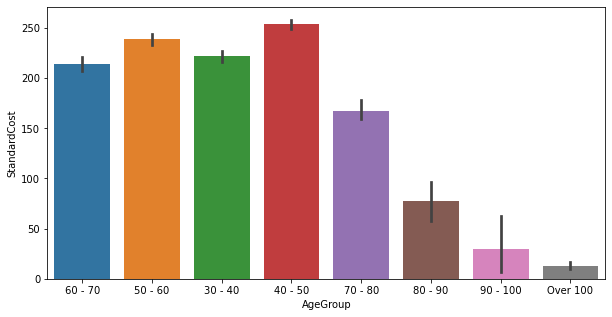

In [285]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(x = 'AgeGroup', y = 'StandardCost', data = df)

### С помощью Т-распределения и p-value (с поправкой Бонферрони) проверим нулевую гипотезу о равном значении среднего между группами

In [286]:
from scipy import stats
from scipy.stats import ttest_ind

groups = df['AgeGroup'].unique()
ttest = []
# ftest = []

# df_between = len(df['AgeGroup'].unique()) - 1
# df_within = len(df['StandardCost']) - 2
# df_total = df_between + df_within
# f_critic = stats.f.ppf(1-0.05, df_between, df_within)
#print(f_critic)
    
for index_1, value_1 in enumerate(groups):
        for index_2, value_2 in enumerate(groups):
            if index_2 > index_1:
                                
                group_1 = df[df['AgeGroup'] == value_1]['StandardCost']
                group_2 = df[df['AgeGroup'] == value_2]['StandardCost']
                
                t, p = ttest_ind(group_1, group_2)
                ttest.append([f'{value_1} - {value_2}:', round(t, 4), round(p, 4)])
                
#                 group_1_mean = group_1.mean()
#                 group_2_mean = group_2.mean()
#                 total_sum = (sum(group_1) + sum(group_2)) / (len(group_1) + len(group_2))

#                 sst = sum((group_1 - total_sum)**2) + sum((group_2 - total_sum)**2)
#                 ssw = sum((group_1 - group_1_mean)**2) + sum((group_2 - group_2_mean)**2)
#                 ssb = sst - ssw

#                 msb = ssb / df_between
#                 msw = ssw / df_within
#                 f = msb / msw
#                 #print(index_1, index_2, value_1, value_2, f)
#                 if f < f_critic:
#                     ftest.append([f'{value_1} - {value_2}:', round(f, 4), round(f_critic, 4)])
                    
threshold = 0.05/len(ttest)
for t in ttest:
    if t[2] > (threshold):
        print(f'{t[0]} T-value: {t[1]}, p-value: {t[2]}, T-critical: {round(stats.t.ppf(1-0.05, df_total), 4)}')

60 - 70 - 30 - 40: T-value: -1.5285, p-value: 0.1264, T-critical: 1.6449
70 - 80 - Over 100: T-value: 2.8772, p-value: 0.004, T-critical: 1.6449
80 - 90 - 90 - 100: T-value: 1.8746, p-value: 0.0612, T-critical: 1.6449
80 - 90 - Over 100: T-value: 1.6675, p-value: 0.0958, T-critical: 1.6449
90 - 100 - Over 100: T-value: 0.7647, p-value: 0.4454, T-critical: 1.6449


Проверим с помощью pairwise_tukeyhsd достоверность показателей.

In [287]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['StandardCost'],
                          groups=df['AgeGroup'],
                          alpha=0.05)

tukey_frame = pd.DataFrame(data = tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_frame[tukey_frame['reject'] == False]

,group1,group2,meandiff,p-adj,lower,upper,reject
2,30 - 40,60 - 70,-7.2811,0.7792,-21.9374,7.3751,False
24,70 - 80,Over 100,-154.6390,0.2051,-343.8458,34.5677,False
25,80 - 90,90 - 100,-47.4066,0.9000,-177.2815,82.4684,False
26,80 - 90,Over 100,-64.3469,0.9000,-259.0430,130.3493,False
27,90 - 100,Over 100,-16.9403,0.9000,-240.5516,206.6710,False


### gender

,Gender
Male,54975
Female,53903


['Female' 'Male']


<AxesSubplot:>

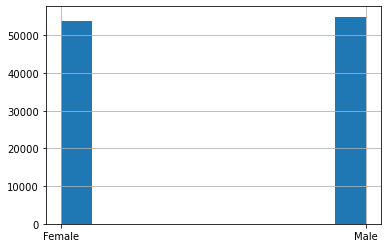

In [288]:
# Узнаем пол наших клиентов:
# Нашим товаром заинтересованы мужчины и женщины

object_check(df['Gender'])
df['Gender'].hist()

### customer_city

In [289]:
# Как мы видим, из многих городов заказывают наш товар
# Давайте выясним топ 15 городов

object_check(df['City'])

,City
London,21616
Paris,14924
Berlin,8008
Shawnee,1647
Newton,1408
...,...
Cheyenne,2
Chehalis,1
Bellevue,1
Byron,1


['Bobigny' 'Stuttgart' 'Kassel' 'London' 'Colma' 'Bremerton' 'Shawnee'
 'Berkeley' 'Gold Coast' 'Neunkirchen' 'Chatou' 'Paris' 'Langley'
 'Olympia' 'Newton' 'Cliffside' 'Brisbane' 'Wokingham' 'Les Ulis'
 'Versailles' 'Santa Monica' 'Vancouver' 'Rhodes' 'East Brisbane'
 'North Ryde' 'Geelong' 'Warrnambool' 'Werne' 'Burlingame' 'Calgary'
 'Concord' 'Walla Walla' 'Lane Cove' 'Silverwater' 'Melbourne' 'Woolston'
 'Burien' 'Malabar' 'Woodburn' 'Bellevue' 'Lincoln Acres' 'Salzgitter'
 'Wollongong' 'Salem' 'Spring Valley' 'Ingolstadt' 'National City'
 'Chula Vista' 'Bendigo' 'Lavender Bay' 'High Wycombe' 'Hannover'
 'Bellflower' 'Corvallis' 'Spokane' 'Port Macquarie' 'Cheltenham'
 'Stoke-on-Trent' 'Maidenhead' 'Downey' 'Coronado' 'Burbank' 'Sydney'
 'Everett' 'Seattle' 'Victoria' 'Hawthorne' 'Goulburn' "Villeneuve-d'Ascq"
 'San Carlos' 'Marysville' 'Dunkerque' 'Lebanon' 'Seaford' 'Findon'
 'Essen' 'Lynnwood' 'Bellingham' 'Oakland' 'Lakewood' 'Novato'
 'Saint Germain en Laye' 'Oak Bay' 'Port H

In [290]:
df['City'].value_counts().head(15)

London               21616
Paris                14924
Berlin                8008
Shawnee               1647
Newton                1408
York                  1221
München               1108
Westminster           1065
Burbank               1008
Cliffside              901
Burnaby                882
Vancouver              752
Hamburg                710
Frankfurt am Main      648
Saint Ouen             597
Name: City, dtype: int64

### sales_amount

count    108878.000000
mean        395.485695
std         766.594458
min           2.290000
25%           7.950000
50%          28.990000
75%          69.990000
max        2443.350000
Name: SalesAmount, dtype: float64


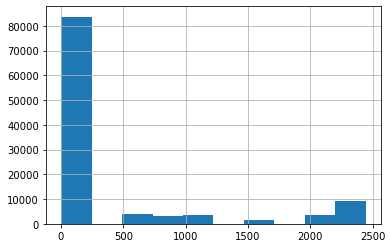

In [291]:
float_check(df['SalesAmount'])

In [292]:
# Проверим объем продаж
# Сначала проверим катгории товаров
# Велосипеды - самая покупаемая категория

sales_amount = df.groupby('Product Category')[['Sub Category','SalesAmount']].max().sort_values('SalesAmount', ascending = False)
sales_amount

,Sub Category,SalesAmount
Product Category,,
Bikes,Touring Bikes,2443.35
Accessories,Tires and Tubes,159.00
Clothing,Vests,69.99


In [293]:
# Проверим теперь самый ходовой товар по категории

product_per_category = df.groupby('Product Name')[['Product Name','Sub Category','SalesAmount','City']
                                                 ].max().sort_values('SalesAmount', ascending = False)

In [294]:
def cost(column):
    sub_category = product_per_category[(product_per_category['Sub Category'] == column)]['Product Name'].max()
    city = product_per_category[(product_per_category['Sub Category'] == column)]['City'].max()
    return "Самый ходовой товар в категории " + column + ' : ' + sub_category + ' в городе ' + city

(*map(cost, df['Sub Category'].unique()),)

('Самый ходовой товар в категории Road Bikes : Road-750 Black, 58 в городе York',
 'Самый ходовой товар в категории Mountain Bikes : Mountain-500 Silver, 52 в городе York',
 'Самый ходовой товар в категории Bottles and Cages : Water Bottle - 30 oz. в городе York',
 'Самый ходовой товар в категории Touring Bikes : Touring-3000 Yellow, 62 в городе York',
 'Самый ходовой товар в категории Helmets : Sport-100 Helmet, Red в городе York',
 'Самый ходовой товар в категории Tires and Tubes : Touring Tire Tube в городе York',
 'Самый ходовой товар в категории Bike Stands : All-Purpose Bike Stand в городе Yakima',
 'Самый ходовой товар в категории Jerseys : Short-Sleeve Classic Jersey, XL в городе York',
 'Самый ходовой товар в категории Gloves : Half-Finger Gloves, S в городе York',
 'Самый ходовой товар в категории Fenders : Fender Set - Mountain в городе York',
 'Самый ходовой товар в категории Caps : AWC Logo Cap в городе York',
 'Самый ходовой товар в категории Socks : Racing Socks, M в гор

### product_name

Water Bottle - 30 oz.      7667
Patch Kit/8 Patches        5795
Road Tire Tube             5102
Mountain Tire Tube         5099
AWC Logo Cap               4344
Sport-100 Helmet, Red      4285
Sport-100 Helmet, Black    4249
Sport-100 Helmet, Blue     3924
Mountain Bottle Cage       3670
Fender Set - Mountain      3459
Touring Tire Tube          3443
Road Bottle Cage           3258
LL Road Tire               2371
Touring Tire               2208
HL Mountain Tire           2066
Name: Product Name, dtype: int64


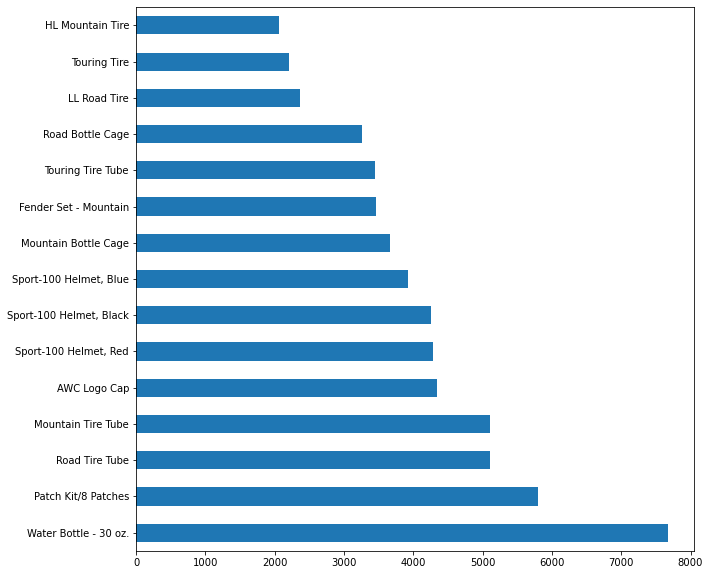

In [295]:
# Повторим действие выше и узнаем самый ходовой товар:
# Water Bottle - 30 oz.

print(df['Product Name'].value_counts().head(15))
plt.rcParams['figure.figsize'] = (10,10)
product_name = df['Product Name'].value_counts().nlargest(15).plot(kind='barh')

### standard_cost

count    108878.000000
mean        231.687701
std         453.505095
min           0.856500
25%           2.973300
50%          10.842300
75%          41.572300
max        1554.947900
Name: StandardCost, dtype: float64


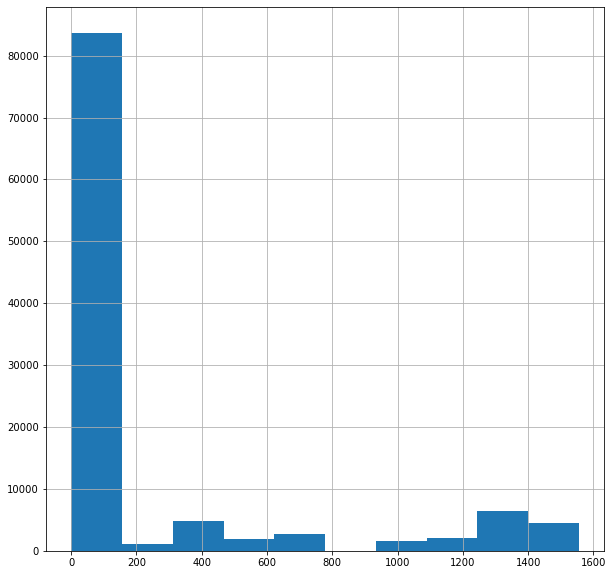

In [296]:
float_check(df['StandardCost'])

In [297]:
# Сгруппируем данные, чтобы увидеть самые дорогостоящие товары по подгруппам

standard_cost = df.groupby('Product Name')[['Product Name','Sub Category','StandardCost']].max().sort_values('StandardCost', ascending = False)

In [298]:
def cost(column):
    sub_category = standard_cost[(standard_cost['Sub Category'] == column)]['Product Name'].max()
    return "Самый дорогостоящий товар в категории " + column + ' : ' + sub_category

(*map(cost, df['Sub Category'].unique()),)

('Самый дорогостоящий товар в категории Road Bikes : Road-750 Black, 58',
 'Самый дорогостоящий товар в категории Mountain Bikes : Mountain-500 Silver, 52',
 'Самый дорогостоящий товар в категории Bottles and Cages : Water Bottle - 30 oz.',
 'Самый дорогостоящий товар в категории Touring Bikes : Touring-3000 Yellow, 62',
 'Самый дорогостоящий товар в категории Helmets : Sport-100 Helmet, Red',
 'Самый дорогостоящий товар в категории Tires and Tubes : Touring Tire Tube',
 'Самый дорогостоящий товар в категории Bike Stands : All-Purpose Bike Stand',
 'Самый дорогостоящий товар в категории Jerseys : Short-Sleeve Classic Jersey, XL',
 'Самый дорогостоящий товар в категории Gloves : Half-Finger Gloves, S',
 'Самый дорогостоящий товар в категории Fenders : Fender Set - Mountain',
 'Самый дорогостоящий товар в категории Caps : AWC Logo Cap',
 'Самый дорогостоящий товар в категории Socks : Racing Socks, M',
 'Самый дорогостоящий товар в категории Hydration Packs : Hydration Pack - 70 oz.',
 'С

In [299]:
df.to_csv (r'dataframe.csv', index = False, header=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108878 entries, 0 to 108877
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ProductKey                108878 non-null  int64  
 1   OrderDateKey              108878 non-null  int64  
 2   DueDateKey                108878 non-null  int64  
 3   ShipDateKey               108878 non-null  int64  
 4   CustomerKey               108878 non-null  int64  
 5   SalesOrderNumber          108878 non-null  object 
 6   SalesAmount               108878 non-null  float64
 7   ProductItemCode           108878 non-null  object 
 8   Product Name              108878 non-null  object 
 9   Sub Category              108878 non-null  object 
 10  Product Category          108878 non-null  object 
 11  StandardCost              108878 non-null  float64
 12  Product Color             55474 non-null   object 
 13  Product Size              38672 non-null   o